### **State University of Campinas - UNICAMP** </br>
**Course**: MC886A </br>
**Professor**: Marcelo da Silva Reis </br>
**TA (PED)**: Marcos Vinicius Souza Freire

---

**Student 1**: Henrique Parede de Souza

**RA 1**: 260497

**Student 2**: Mateus de Lima Almeida

**RA 2**: 242827

---

### **Assignment 4: MC886A**
#### **Transfer Learning with Transformers for Text Classification**
##### Notebook: mc886_1s2025-assignment_4.ipynb

---

### **Building on Previous Knowledge**
In our last hands-on, we dealt with **sentiment analysis** using the IMDB movie review dataset - a **binary classification** task where you predicted positive or negative sentiment. You learned the fundamentals of text preprocessing, neural networks, and basic classification techniques.

Now, we're taking a significant step forward! 🚀

## **Objective**

Explore **Transfer Learning** with **Transformers** through a hands-on implementation of multi-class text classification. This assignment focuses on understanding transformer architectures, attention mechanisms, and advanced fine-tuning techniques using PyTorch and [Hugging Face Transformers](https://huggingface.co/). Get a look at: [Transformers](https://huggingface.co/docs/transformers/en/index)

## **Dataset: AG News Classification**

You'll work with the **AG News Dataset** - a multi-class news categorization task with 4 classes:
- **World** (0): World news
- **Sports** (1): Sports news  
- **Business** (2): Business news
- **Technology** (3): Science and technology news

This dataset contains 120,000 training samples and 7,600 test samples, providing a challenging and realistic NLP scenario.

### **Dataset Examples**

**World News:**
> "Ukraine's President Calls for Calm After Opposition Protests. Ukraine's president urged calm and dialogue after thousands of opposition supporters rallied in Kiev to protest alleged election fraud."

**Sports:**  
> "Lakers Defeat Celtics in Overtime Thriller. LeBron James scored 35 points as the Los Angeles Lakers defeated the Boston Celtics 118-115 in a thrilling overtime game."

**Business:**
> "Tesla Stock Surges on Record Quarterly Deliveries. Tesla shares jumped 8% in pre-market trading after the electric vehicle maker reported record quarterly deliveries exceeding analyst expectations."

**Science/Technology:**
> "New AI Model Achieves Human-Level Performance on Reading Comprehension. Researchers unveiled a transformer-based model that matches human performance on complex reading comprehension tasks."

---

### **The Challenge**
You need to categorize news articles into the correct topic area - just like how news websites organize their content!

**What you're building:**
- **Input**: A news article (title + description)
- **Output**: Predicted category (World, Sports, Business, or Science/Technology)
- **Real-world application**: Automated content organization, news recommendation systems, media monitoring

### **Example Classification**

Let's see what your model will learn to do:

**Input Article:** *"Apple Reports Record iPhone Sales in Q4. Apple Inc. announced today that iPhone sales reached an all-time high in the fourth quarter, driven by strong demand for the new iPhone 15 series across global markets."*

**Your Model's Job:**
- ❌ World (politics/international affairs)
- ❌ Sports (games/athletics)  
- ✅ **Business** (companies/markets/economy)
- ❌ Science/Tech (research/innovation)

**Why Business?** Keywords like "sales," "quarter," "demand," "markets" indicate business/financial news rather than pure technology.

---

## **IMPORTANT: Dataset Exploration and Visualization Requirements**

As part of your assignment evaluation, you **MUST**:

1. **Explore the dataset thoroughly** - Analyze class distributions, text lengths, vocabulary statistics
2. **Create meaningful visualizations** - This includes but is not limited to:
   - Class distribution bar charts
   - Text length histograms
   - Sample text examples from each category
3. **Implement the models** - All implementations asked in the following four sections
4. **Document your findings** - Explain what you observe about the dataset characteristics

**This exploration and visualization component will be part of your grading criteria.**

---

## **Section 1: Dataset Loading and Preprocessing**

### **Learning Objectives**
- Understand multi-class text classification datasets using Transformers
- Implement proper data splitting and preprocessing
- Create custom PyTorch datasets for transformer models

### **Implementation Task**

You need to complete the dataset loading and preprocessing pipeline. The **AG News dataset** requires special handling for multi-class labels.

```python
# Required installations
!pip install torch transformers datasets torchmetrics

# Basic imports (add missing imports as needed)
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    get_linear_schedule_with_warmup
)

# Set random seeds for reproducibility
# TODO: Implement seed setting for random, numpy, and torch

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Model Parameters
params = {
    'model_name': "distilbert-base-uncased",
    'num_classes': 4,
    'batch_size': 32,
    'learning_rate': 2e-5,
    'weight_decay': 0.01,
    'max_length': 128,
    'epochs': 3,
    'warmup_steps': 500,
}
```

### ***HINT: Dataset Loading***
```python
# TODO: Load the CSV files
# Remember to:
# 1. Skip the header row (skiprows=1)
# 2. Assign proper column names: ['label', 'title', 'description']
# 3. Convert labels from 1-based to 0-based indexing
# 4. Create 'full_text' by combining title and description
# 5. Split training data into train/validation (90/10 split)

# train_df = pd.read_csv(...)
# test_df = pd.read_csv(...)
```

### **Custom Dataset Class Implementation (just an example)**
```python
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        # TODO: Initialize dataset components
        pass
    
    def __len__(self):
        # TODO: Return dataset size
        pass
    
    def __getitem__(self, idx):
        # TODO: Implement tokenization and return proper format
        # Should return: {
        #     'input_ids': ...,
        #     'attention_mask': ...,
        #     'labels': ...
        # }
        pass
```

---

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
!pip3 install torch transformers datasets torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 55.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [3]:
!pip3 install numpy pandas matplotlib seaborn tqdm ipywidgets scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.3 MB/s eta 0:00:00


In [8]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!jupyter nbextension enable --py widgetsnbextension
!pip3 install jupyterlab_widgets

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: bundlerextension console dejavu execute kernel
kernelgateway kernelspec migrate nbclassic nbconvert nbextension notebook run
server serverextension troubleshoot trust

Jupyter command `jupyter-labextension` not found.
Enabling notebook extension jupyter-js-widgets/extension

In [9]:
# Basic imports (add missing imports as needed)
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torchmetrics
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm


from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    get_linear_schedule_with_warmup
)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

# Set random seeds for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

base_path = "/content/gdrive/My Drive/MC886/assignment_4/"
print("Path:", base_path)

# Model Parameters
params = {
    'model_name': "distilbert-base-uncased",
    'num_classes': 4,
    'batch_size': 32,
    'learning_rate': 2e-5,
    'weight_decay': 0.01,
    'max_length': 128,
    'epochs': 3,
    'warmup_steps': 500,
}

Using device: cuda
Path: /content/gdrive/My Drive/MC886/assignment_4/


In [10]:
### ***HINT: Dataset Loading**
# TODO: Load the CSV files
# Remember to:
# 1. Skip the header row (skiprows=1)
# 2. Assign proper column names: ['label', 'title', 'description']
# 3. Convert labels from 1-based to 0-based indexing
# 4. Create 'full_text' by combining title and description
# 5. Split training data into train/validation (90/10 split)

train_df = pd.read_csv(base_path + "train.csv", skiprows=1, names=['label', 'title', 'description'])
test_df = pd.read_csv(base_path + "test.csv", skiprows=1, names=['label', 'title', 'description'])

train_df['label'] = train_df['label'] - 1
test_df['label'] = test_df['label'] - 1

train_df['full_text'] = train_df['title'] + ". " + train_df['description']
test_df['full_text'] = test_df['title'] + ". " + test_df['description']

train_df, val_df = train_test_split(
    train_df,
    test_size=0.1,
    stratify=train_df['label'],
    random_state=SEED
)

print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")

Train: 108000, Validation: 12000, Test: 7600


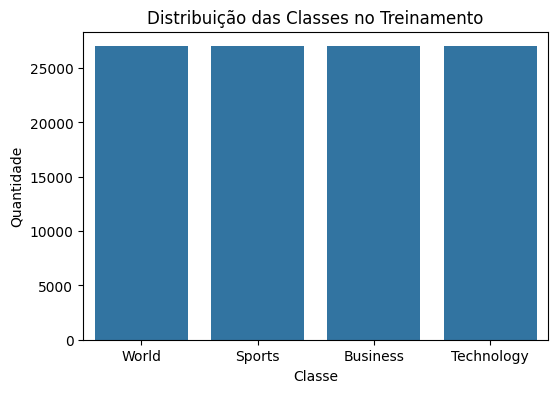

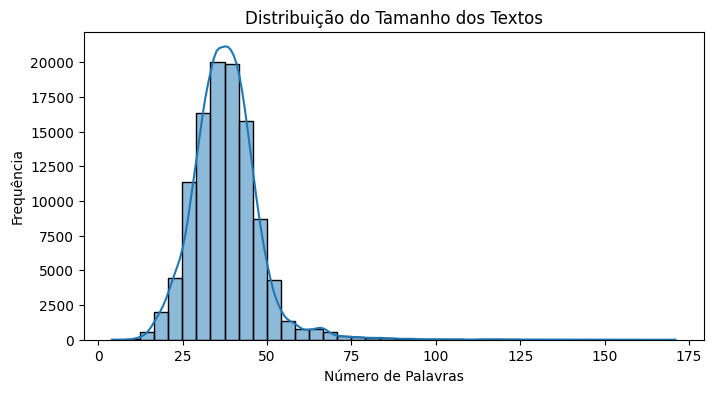

Exemplo da classe World:
Título: Explosions caused mushroom cloud over N. Korea: source
Descrição: SEOUL, SOUTH KOREA - A mushroom-shaped cloud was seen in North Korea last Thursday following a large explosion, a South Korean news agency reported Sunday.

Exemplo da classe Sports:
Título: 10 seconds that change everything
Descrição: ATHENS - Ten seconds. Barely time enough to tie a shoe, wash a glass, get the paper off the porch. But when the moment comes, and eight men kneel at their blocks and peer down the empty, waiting track, it is as if the entire Olympics stop to watch.

Exemplo da classe Business:
Título: Ex-El Paso Traders Plead Guilty to False Reports
Descrição: Two more former natural gas traders for El Paso Corp. have pleaded guilty to reporting bogus deals in a widening investigation of the industry, the US Attorney #39;s Office said.

Exemplo da classe Technology:
Título: XBox Owner Sues Microsoft
Descrição: drusoicy writes  quot;Reuters is reporting that Sean Burke has f

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=train_df)
plt.title('Distribuição das Classes no Treinamento')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks([0,1,2,3], ['World', 'Sports', 'Business', 'Technology'])
plt.show()

train_df['text_length'] = train_df['full_text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,4))
sns.histplot(train_df['text_length'], bins=40, kde=True)
plt.title('Distribuição do Tamanho dos Textos')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência')
plt.show()

for label, name in enumerate(['World', 'Sports', 'Business', 'Technology']):
    sample = train_df[train_df['label'] == label].iloc[0]
    print(f"Exemplo da classe {name}:\nTítulo: {sample['title']}\nDescrição: {sample['description']}\n")

In [11]:
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts.tolist() if isinstance(texts, pd.Series) else texts
        self.labels = labels.tolist() if isinstance(labels, pd.Series) else labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

## **Section 2: Model Architecture and Embedding Visualization**

### **Learning Objectives**
- Load and analyze pre-trained transformer models
- Visualize transformer embeddings before fine-tuning
- Understand how different layers capture different features

### **Implementation Task**

Load the pre-trained model and implement embedding extraction and visualization.

```python
# TODO: Load the pre-trained model
# model = AutoModelForSequenceClassification.from_pretrained(...)

def get_embeddings(model, dataloader, max_batches=5):
    """Extract embeddings from the model"""
    # TODO: Implement embedding extraction
    # HINTS:
    # 1. Set model to eval mode
    # 2. Use torch.no_grad()
    # 3. Extract hidden_states from model output
    # 4. Return hidden states and labels
    pass

def visualize_embeddings(hidden_states_batch, labels, layers_to_viz=[0, 3, 5], method='both'):
    """Visualize embeddings using PCA and/or t-SNE"""
    # TODO: Implement visualization
    # HINTS:
    # 1. Use average pooling over sequence length
    # 2. Apply PCA and t-SNE dimensionality reduction
    # 3. Create scatter plots for different layers
    # 4. Use class_names for colorbar labels
    pass
```

**Implementation Hints:**
- Use `output_hidden_states=True` when calling the model
- For visualization, focus on layers [0, 3, 5] to see progression
- Apply mean pooling across sequence dimension before PCA/t-SNE

---

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


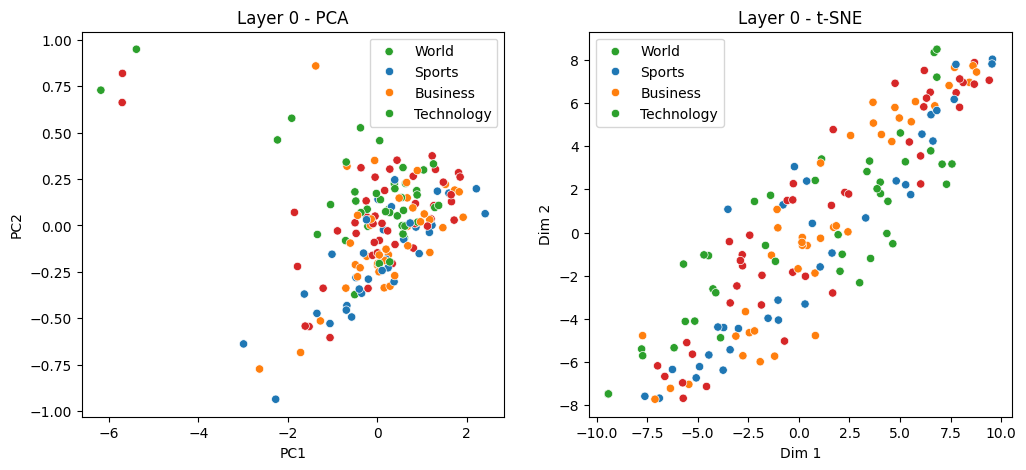

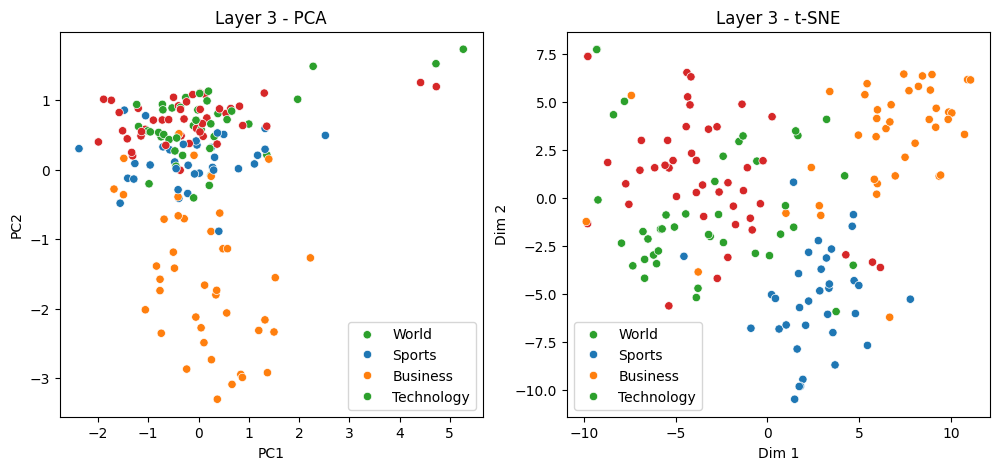

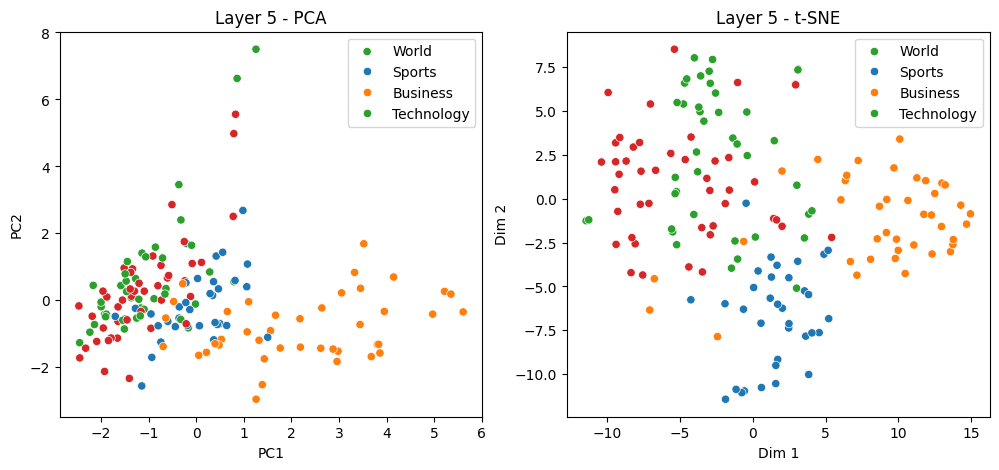

In [ ]:
def get_embeddings(model, dataloader, max_batches=5):
    model.eval()
    all_hidden_states = []
    all_labels = []

    with torch.no_grad():
        for i, batch in enumerate(dataloader):
            if i >= max_batches:
                break
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                output_hidden_states=True,
                return_dict=True
            )
            hidden_states = [h.cpu() for h in outputs.hidden_states]
            all_hidden_states.append(hidden_states)
            all_labels.append(labels.cpu())

    hidden_states_per_layer = []
    for layer in range(len(all_hidden_states[0])):
        layer_states = torch.cat([batch[layer] for batch in all_hidden_states], dim=0)
        hidden_states_per_layer.append(layer_states)

    all_labels = torch.cat(all_labels, dim=0)

    return hidden_states_per_layer, all_labels

def visualize_embeddings(hidden_states_batch, labels, layers_to_viz=[0, 3, 5]):

    class_names = ['World', 'Sports', 'Business', 'Technology']
    for layer in layers_to_viz:
        features = hidden_states_batch[layer].mean(dim=1).numpy()
        y = labels.numpy()
        plt.figure(figsize=(12, 5))

        pca = PCA(n_components=2)
        reduced = pca.fit_transform(features)
        plt.subplot(1, 2, 1)
        sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=y, palette='tab10', legend='full')
        plt.title(f'Layer {layer} - PCA')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend(class_names)

        tsne = TSNE(n_components=2, random_state=42, perplexity=30)
        reduced = tsne.fit_transform(features)
        plt.subplot(1, 2, 2)
        sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=y, palette='tab10', legend='full')
        plt.title(f'Layer {layer} - t-SNE')
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')
        plt.legend(class_names)


tokenizer = AutoTokenizer.from_pretrained(params['model_name'])
model = AutoModelForSequenceClassification.from_pretrained(params['model_name'], num_labels=params['num_classes'], output_hidden_states=True).to(device)

sample_size = 512
sample_df = train_df.sample(sample_size, random_state=SEED)
sample_dataset = NewsDataset(
    texts=sample_df['full_text'],
    labels=sample_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
sample_loader = DataLoader(sample_dataset, batch_size=32, shuffle=False)

hidden_states_batch, labels_batch = get_embeddings(model, sample_loader, max_batches=5)

visualize_embeddings(hidden_states_batch, labels_batch, layers_to_viz=[0, 3, 5])

## **Section 3: Fine-tuning and Training**

### **Learning Objectives**
- Implement transfer learning strategies (freezing/unfreezing layers)
- Set up training loop with proper metrics tracking
- Understand warmup scheduling and optimization techniques

### **Implementation Task**

Implement the fine-tuning process with proper parameter freezing and training loop.

```python
# TODO: Implement parameter freezing
# HINTS:
# 1. Freeze base model parameters: model.base_model.parameters()
# 2. Keep classifier parameters trainable: model.classifier.parameters()

# TODO: Setup optimizer and scheduler
# optimizer = optim.AdamW(...)
# scheduler = get_linear_schedule_with_warmup(...)

def train_epoch(model, dataloader, optimizer, scheduler, criterion, device, accuracy_metric):
    """Train for one epoch"""
    # TODO: Implement training loop
    # HINTS:
    # 1. Set model to train mode
    # 2. Iterate through dataloader with progress bar
    # 3. Forward pass, backward pass, optimizer step
    # 4. Update scheduler and metrics
    # 5. Return average loss and accuracy
    pass

def evaluate(model, dataloader, criterion, device, accuracy_metric):
    """Evaluate the model"""
    # TODO: Implement evaluation loop  
    # HINTS:
    # 1. Set model to eval mode
    # 2. Use torch.no_grad()
    # 3. Collect predictions and labels
    # 4. Return loss, accuracy, predictions, labels
    pass

# TODO: Implement main training loop
# for epoch in range(params['epochs']):
#     # Training and validation steps
#     # Store history for plotting
```

**Key Implementation Points:**
- Use `torchmetrics` for metric computation
- Implement proper progress bars with `tqdm` (optional)
- Store training history for visualization

---

## **Section 4: Evaluation and Advanced Analysis**

### **Learning Objectives**
- Evaluate model performance with comprehensive metrics
- Visualize results through confusion matrices and plots
- Compare embeddings before and after fine-tuning
- Explore advanced fine-tuning strategies

### **Implementation Task**

Complete the evaluation pipeline and advanced analysis.

```python
# TODO: Comprehensive evaluation
# 1. Test set evaluation
# 2. Classification report with precision, recall, F1
# 3. Confusion matrix visualization
# 4. Training history plots

# Advanced Analysis Tasks:
def plot_training_history(history):
    """Plot loss and accuracy curves"""
    # TODO: Create subplots for loss and accuracy
    pass

def create_classification_report(predictions, labels, class_names):
    """Generate detailed classification report"""
    # TODO: Use torchmetrics to compute precision, recall, F1
    # Print formatted report
    pass

def plot_confusion_matrix(predictions, labels, class_names):
    """Create confusion matrix heatmap"""
    # TODO: Use seaborn heatmap
    pass

# Post-fine-tuning embedding comparison
# TODO: Extract embeddings after fine-tuning
# TODO: Compare with pre-fine-tuning embeddings
```

### **Advanced Experiments (Bonus)**

```python
# Experiment 1: Unfreeze more layers
# TODO: Unfreeze last transformer layer
# Compare performance improvement

# Experiment 2: Learning rate analysis
# TODO: Test different learning rates [1e-5, 2e-5, 5e-5, 1e-4]

# Experiment 3: Architecture analysis
# TODO: Analyze parameter distribution across layers
```

---

## DistilBERT

In [13]:
def train_epoch(model, dataloader, optimizer, scheduler, device, accuracy_metric):
    model.train()
    epoch_loss = 0
    epoch_acc = 0
    for batch in tqdm(dataloader, desc="Training", leave=False):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        acc = accuracy_metric(preds.cpu(), labels.cpu())
        loss.backward()
        optimizer.step()
        scheduler.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(dataloader), epoch_acc / len(dataloader)

def evaluate(model, dataloader, device, accuracy_metric):
    model.eval()
    eval_loss = 0
    eval_acc = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            acc = accuracy_metric(preds.cpu(), labels.cpu())
            eval_loss += loss.item()
            eval_acc += acc.item()
            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())
    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    return eval_loss / len(dataloader), eval_acc / len(dataloader), all_preds, all_labels

In [ ]:
for param in model.base_model.parameters():
    param.requires_grad = False

for param in model.classifier.parameters():
    param.requires_grad = True

optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=params['learning_rate'], weight_decay=params['weight_decay'])
total_steps = len(train_df) // params['batch_size'] * params['epochs']
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=params['warmup_steps'],
    num_training_steps=total_steps
)

train_dataset = NewsDataset(
    texts=train_df['full_text'],
    labels=train_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
val_dataset = NewsDataset(
    texts=val_df['full_text'],
    labels=val_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=params['batch_size'], shuffle=False)

accuracy_metric = torchmetrics.classification.MulticlassAccuracy(num_classes=params['num_classes'])

history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
for epoch in range(params['epochs']):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, scheduler, device, accuracy_metric)
    val_loss, val_acc, _, _ = evaluate(model, val_loader, device, accuracy_metric)
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    print(f"Epoch {epoch+1}/{params['epochs']} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

val_loss, val_acc, val_preds, val_labels = evaluate(model, val_loader, device, accuracy_metric)
print(f"Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc:.4f}")

model.save_pretrained(base_path + "distilbert_agnews_finetuned")
tokenizer.save_pretrained(base_path + "distilbert_agnews_finetuned")
torch.save(history, base_path + "distilbert_agnews_finetuned/training_history.pt")

Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

Epoch 1/3 | Train Loss: 0.3072 | Train Acc: 0.8932 | Val Loss: 0.2812 | Val Acc: 0.8963


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

Epoch 2/3 | Train Loss: 0.2969 | Train Acc: 0.8961 | Val Loss: 0.2749 | Val Acc: 0.8993


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

Epoch 3/3 | Train Loss: 0.2922 | Train Acc: 0.8960 | Val Loss: 0.2731 | Val Acc: 0.8991


Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

Validation Loss: 0.2731 | Validation Accuracy: 0.8991


In [12]:
def plot_training_history(history):
    """Plot loss and accuracy curves"""
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history['train_acc'], label='Train Acc')
    plt.plot(history['val_acc'], label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.tight_layout()
    plt.show()

def create_classification_report(predictions, labels, class_names):
    """Generate detailed classification report"""
    y_true = labels.cpu().numpy() if isinstance(labels, torch.Tensor) else labels
    y_pred = predictions.cpu().numpy() if isinstance(predictions, torch.Tensor) else predictions
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

def plot_confusion_matrix(predictions, labels, class_names):
    """Create confusion matrix heatmap"""
    y_true = labels.cpu().numpy() if isinstance(labels, torch.Tensor) else labels
    y_pred = predictions.cpu().numpy() if isinstance(predictions, torch.Tensor) else predictions
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

Evaluating:   0%|          | 0/238 [00:00<?, ?it/s]

Test Loss: 0.2865 | Test Accuracy: 0.8941
              precision    recall  f1-score   support

       World     0.9104    0.8932    0.9017      1900
      Sports     0.9623    0.9811    0.9716      1900
    Business     0.8598    0.8426    0.8511      1900
  Technology     0.8616    0.8784    0.8700      1900

    accuracy                         0.8988      7600
   macro avg     0.8985    0.8988    0.8986      7600
weighted avg     0.8985    0.8988    0.8986      7600



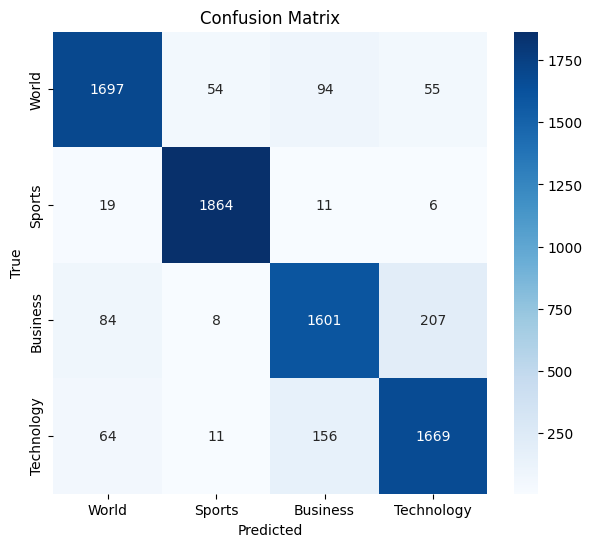

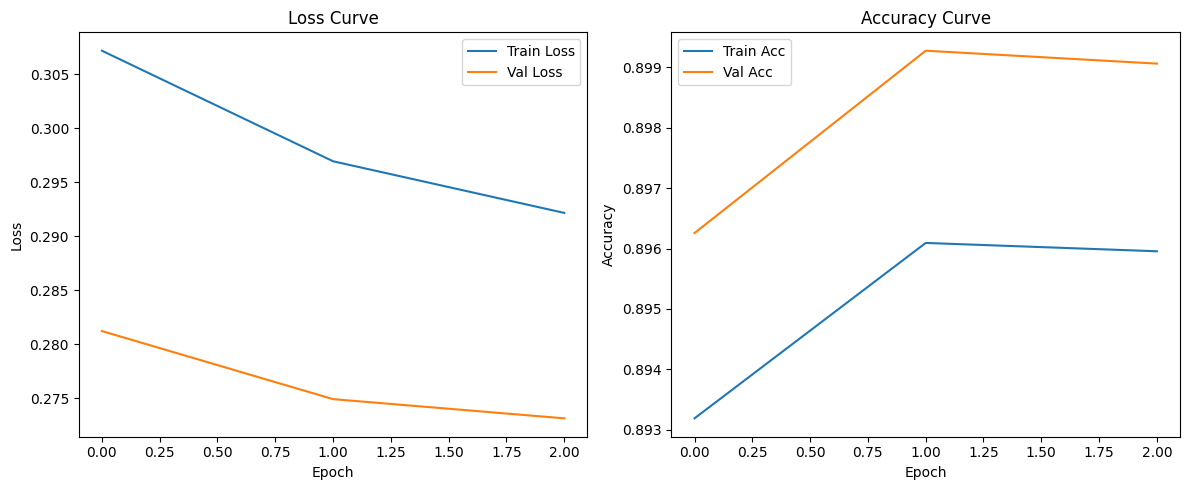

Total de exemplos classificados incorretamente: 769

Texto: Calif. Aims to Limit Farm-Related Smog (AP). AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.
Verdadeiro: Technology | Predito: Business
--------------------------------------------------------------------------------
Texto: E-mail scam targets police chief. Wiltshire Police warns about "phishing" after its fraud squad chief was targeted.
Verdadeiro: Technology | Predito: World
--------------------------------------------------------------------------------
Texto: Rivals Try to Turn Tables on Charles Schwab. By MICHAEL LIEDTKE     SAN FRANCISCO (AP) -- With its low prices and iconoclastic attitude, discount stock broker Charles Schwab Corp. (SCH) represented an annoying stone in Wall Street's wing-tipped shoes for decades...
Verdadeiro: Technology | Predito: Business
-------------------------------

In [14]:
model = AutoModelForSequenceClassification.from_pretrained(base_path + "distilbert_agnews_finetuned").to(device)
tokenizer = AutoTokenizer.from_pretrained(base_path + "distilbert_agnews_finetuned")
history = torch.load(base_path + "distilbert_agnews_finetuned/training_history.pt")

accuracy_metric = torchmetrics.classification.MulticlassAccuracy(num_classes=params['num_classes'])

test_dataset = NewsDataset(
    texts=test_df['full_text'],
    labels=test_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
test_loader = DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)

test_loss, test_acc, test_preds, test_labels = evaluate(model, test_loader, device, accuracy_metric)
print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

class_names = ['World', 'Sports', 'Business', 'Technology']
create_classification_report(test_preds, test_labels, class_names)
plot_confusion_matrix(test_preds, test_labels, class_names)
plot_training_history(history)

incorrect = (test_preds != test_labels)
incorrect_indices = torch.where(incorrect)[0].numpy()

class_names = ['World', 'Sports', 'Business', 'Technology']

print(f"Total de exemplos classificados incorretamente: {len(incorrect_indices)}\n")
for idx in incorrect_indices[:10]:
    row = test_df.iloc[idx]
    true_label = class_names[row['label']]
    pred_label = class_names[test_preds[idx].item()] if isinstance(test_preds[idx], torch.Tensor) else class_names[int(test_preds[idx])]
    print(f"Texto: {row['full_text']}\nVerdadeiro: {true_label} | Predito: {pred_label}\n{'-'*80}")

### Visualize embeddings

Embeddings após fine-tuning:


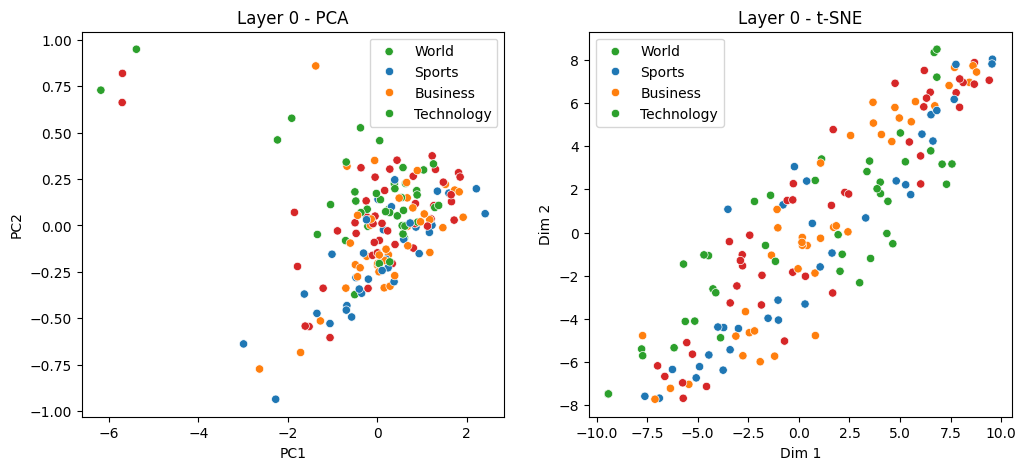

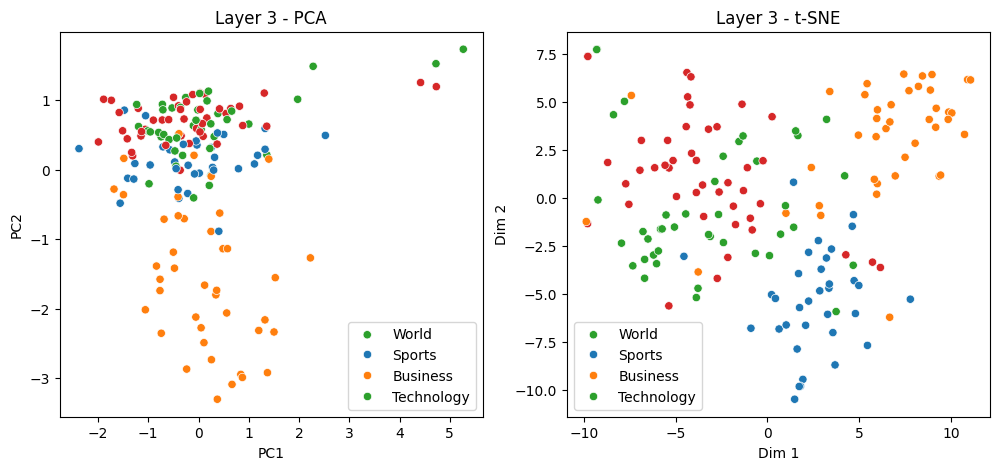

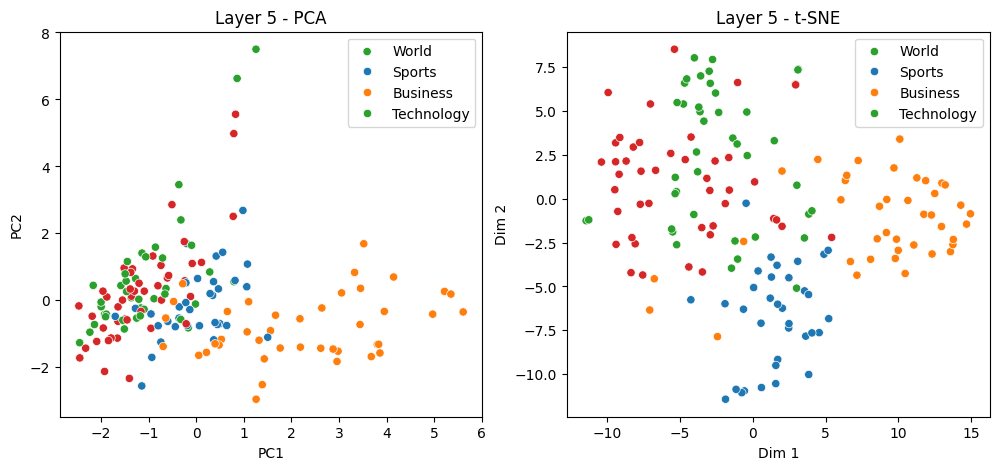

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(base_path + "distilbert_agnews_finetuned").to(device)

hidden_states_finetuned, labels_finetuned = get_embeddings(model, sample_loader, max_batches=5)

print("Embeddings após fine-tuning:")
visualize_embeddings(hidden_states_finetuned, labels_finetuned, layers_to_viz=[0, 3, 5])

### Advanced Experiments

### 1. Unfreeze last layers

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(base_path + "distilbert_agnews_finetuned").to(device)
tokenizer = AutoTokenizer.from_pretrained(base_path + "distilbert_agnews_finetuned")

for name, param in model.base_model.named_parameters():
    if "transformer.layer.5" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

for param in model.classifier.parameters():
    param.requires_grad = True

total_steps = len(train_df) // params['batch_size'] * params['epochs']
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=params['learning_rate'], weight_decay=params['weight_decay'])
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=params['warmup_steps'],
    num_training_steps=total_steps
)

train_dataset = NewsDataset(
    texts=train_df['full_text'],
    labels=train_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
val_dataset = NewsDataset(
    texts=val_df['full_text'],
    labels=val_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=params['batch_size'], shuffle=False)

accuracy_metric = torchmetrics.classification.MulticlassAccuracy(num_classes=params['num_classes'])

history_unfreeze = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
for epoch in range(1):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, scheduler, device, accuracy_metric)
    val_loss, val_acc, _, _ = evaluate(model, val_loader, device, accuracy_metric)
    history_unfreeze['train_loss'].append(train_loss)
    history_unfreeze['train_acc'].append(train_acc)
    history_unfreeze['val_loss'].append(val_loss)
    history_unfreeze['val_acc'].append(val_acc)
print(f"Unfreezing last layer | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

model.save_pretrained(base_path + "distilbert_agnews_unfreeze_last")
tokenizer.save_pretrained(base_path + "distilbert_agnews_unfreeze_last")
torch.save(history_unfreeze, base_path + "distilbert_agnews_unfreeze_last/training_history.pt")

Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

Unfreezing last layer | Train Acc: 0.9121 | Val Acc: 0.9273


### 2. Learning Rates

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(base_path + "distilbert_agnews_finetuned").to(device)
tokenizer = AutoTokenizer.from_pretrained(base_path + "distilbert_agnews_finetuned")

train_dataset = NewsDataset(
    texts=train_df['full_text'],
    labels=train_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
val_dataset = NewsDataset(
    texts=val_df['full_text'],
    labels=val_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=params['batch_size'], shuffle=False)

accuracy_metric = torchmetrics.classification.MulticlassAccuracy(num_classes=params['num_classes'])

learning_rates = [1e-5, 2e-5, 5e-5, 1e-4]
results_lr = {}
for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")

    model_lr = AutoModelForSequenceClassification.from_pretrained(params['model_name'], num_labels=params['num_classes']).to(device)
    for param in model_lr.base_model.parameters():
        param.requires_grad = False
    for param in model_lr.classifier.parameters():
        param.requires_grad = True
    optimizer_lr = optim.AdamW(filter(lambda p: p.requires_grad, model_lr.parameters()), lr=lr, weight_decay=params['weight_decay'])
    scheduler_lr = get_linear_schedule_with_warmup(
        optimizer_lr,
        num_warmup_steps=params['warmup_steps'],
        num_training_steps=total_steps
    )

    history_lr = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for epoch in range(1):
        train_loss, train_acc = train_epoch(model_lr, train_loader, optimizer_lr, scheduler_lr, device, accuracy_metric)
        val_loss, val_acc, _, _ = evaluate(model_lr, val_loader, device, accuracy_metric)
        history_lr['train_loss'].append(train_loss)
        history_lr['train_acc'].append(train_acc)
        history_lr['val_loss'].append(val_loss)
        history_lr['val_acc'].append(val_acc)
    results_lr[lr] = history_lr
    print(f"LR={lr} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    model_lr.save_pretrained(f"{base_path}distilbert_agnews_lr_{lr}")
    tokenizer.save_pretrained(f"{base_path}distilbert_agnews_lr_{lr}")
    torch.save(history_lr, f"{base_path}distilbert_agnews_lr_{lr}/training_history.pt")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Testing learning rate: 1e-05


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

LR=1e-05 | Train Acc: 0.8099 | Val Acc: 0.8787

Testing learning rate: 2e-05


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

LR=2e-05 | Train Acc: 0.8430 | Val Acc: 0.8872


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Testing learning rate: 5e-05


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

LR=5e-05 | Train Acc: 0.8555 | Val Acc: 0.8930

Testing learning rate: 0.0001


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

LR=0.0001 | Train Acc: 0.8704 | Val Acc: 0.8986


### 3. Parameters distribution across layers

In [ ]:
def print_parameter_distribution(model):
    total = 0
    for name, param in model.named_parameters():
        print(f"{name}: {param.numel()} parameters, requires_grad={param.requires_grad}")
        total += param.numel()
    print(f"Total parameters: {total}")

model = AutoModelForSequenceClassification.from_pretrained(base_path + "distilbert_agnews_finetuned").to(device)
print_parameter_distribution(model)

distilbert.embeddings.word_embeddings.weight: 23440896 parameters, requires_grad=True
distilbert.embeddings.position_embeddings.weight: 393216 parameters, requires_grad=True
distilbert.embeddings.LayerNorm.weight: 768 parameters, requires_grad=True
distilbert.embeddings.LayerNorm.bias: 768 parameters, requires_grad=True
distilbert.transformer.layer.0.attention.q_lin.weight: 589824 parameters, requires_grad=True
distilbert.transformer.layer.0.attention.q_lin.bias: 768 parameters, requires_grad=True
distilbert.transformer.layer.0.attention.k_lin.weight: 589824 parameters, requires_grad=True
distilbert.transformer.layer.0.attention.k_lin.bias: 768 parameters, requires_grad=True
distilbert.transformer.layer.0.attention.v_lin.weight: 589824 parameters, requires_grad=True
distilbert.transformer.layer.0.attention.v_lin.bias: 768 parameters, requires_grad=True
distilbert.transformer.layer.0.attention.out_lin.weight: 589824 parameters, requires_grad=True
distilbert.transformer.layer.0.attention

## BERT

In [15]:
def train_epoch(model, dataloader, optimizer, scheduler, device, accuracy_metric):
    model.train()
    epoch_loss = 0
    epoch_acc = 0
    for batch in tqdm(dataloader, desc="Training", leave=False):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        acc = accuracy_metric(preds.cpu(), labels.cpu())
        loss.backward()
        optimizer.step()
        scheduler.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(dataloader), epoch_acc / len(dataloader)

def evaluate(model, dataloader, device, accuracy_metric):
    model.eval()
    eval_loss = 0
    eval_acc = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating", leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)
            acc = accuracy_metric(preds.cpu(), labels.cpu())
            eval_loss += loss.item()
            eval_acc += acc.item()
            all_preds.append(preds.cpu())
            all_labels.append(labels.cpu())
    all_preds = torch.cat(all_preds)
    all_labels = torch.cat(all_labels)
    return eval_loss / len(dataloader), eval_acc / len(dataloader), all_preds, all_labels

In [ ]:
#congelar todas as camadas do BERT exceto o classificador
for param in model.bert.parameters():
    param.requires_grad = False

for param in model.classifier.parameters():
    param.requires_grad = True

#ctimizador e scheduler
optimizer = optim.AdamW(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=params['learning_rate'],
    weight_decay=params['weight_decay']
)

total_steps = len(train_df) // params['batch_size'] * params['epochs']
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=params['warmup_steps'],
    num_training_steps=total_steps
)

#datasets e dataloaders
train_dataset = NewsDataset(
    texts=train_df['full_text'],
    labels=train_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
val_dataset = NewsDataset(
    texts=val_df['full_text'],
    labels=val_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)

train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=params['batch_size'], shuffle=False)

#metrica
accuracy_metric = torchmetrics.classification.MulticlassAccuracy(num_classes=params['num_classes'])

#loop de treinamento
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
for epoch in range(params['epochs']):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, scheduler, device, accuracy_metric)
    val_loss, val_acc, _, _ = evaluate(model, val_loader, device, accuracy_metric)
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    print(f"Epoch {epoch+1}/{params['epochs']} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

#avaliação final
val_loss, val_acc, val_preds, val_labels = evaluate(model, val_loader, device, accuracy_metric)
print(f"Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc:.4f}")

#salvar modelo e histórico
model.save_pretrained(base_path + "bert_agnews_finetuned")
tokenizer.save_pretrained(base_path + "bert_agnews_finetuned")
torch.save(history, base_path + "bert_agnews_finetuned/training_history.pt")


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

Epoch 1/3 | Train Loss: 1.2926 | Train Acc: 0.4446 | Val Loss: 1.2032 | Val Acc: 0.5768


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

Epoch 2/3 | Train Loss: 1.1734 | Train Acc: 0.5652 | Val Loss: 1.1301 | Val Acc: 0.6146


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

Epoch 3/3 | Train Loss: 1.1273 | Train Acc: 0.6003 | Val Loss: 1.1089 | Val Acc: 0.6301


Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

Validation Loss: 1.1089 | Validation Accuracy: 0.6301


In [16]:
def plot_training_history(history):
    """Plot loss and accuracy curves"""
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history['train_acc'], label='Train Acc')
    plt.plot(history['val_acc'], label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.tight_layout()
    plt.show()

def create_classification_report(predictions, labels, class_names):
    """Generate detailed classification report"""
    y_true = labels.cpu().numpy() if isinstance(labels, torch.Tensor) else labels
    y_pred = predictions.cpu().numpy() if isinstance(predictions, torch.Tensor) else predictions
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

def plot_confusion_matrix(predictions, labels, class_names):
    """Create confusion matrix heatmap"""
    y_true = labels.cpu().numpy() if isinstance(labels, torch.Tensor) else labels
    y_pred = predictions.cpu().numpy() if isinstance(predictions, torch.Tensor) else predictions
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

Evaluating:   0%|          | 0/238 [00:00<?, ?it/s]

Test Loss: 1.1124 | Test Accuracy: 0.6168
              precision    recall  f1-score   support

       World     0.5675    0.7658    0.6519      1900
      Sports     0.6830    0.7200    0.7010      1900
    Business     0.5831    0.4895    0.5322      1900
  Technology     0.6926    0.5242    0.5968      1900

    accuracy                         0.6249      7600
   macro avg     0.6315    0.6249    0.6205      7600
weighted avg     0.6315    0.6249    0.6205      7600



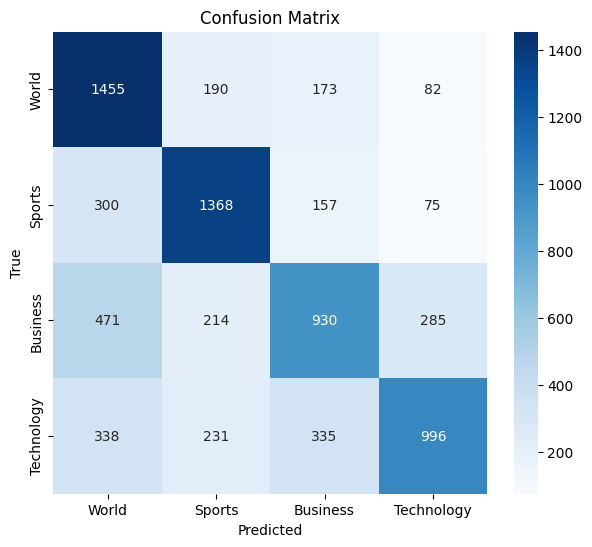

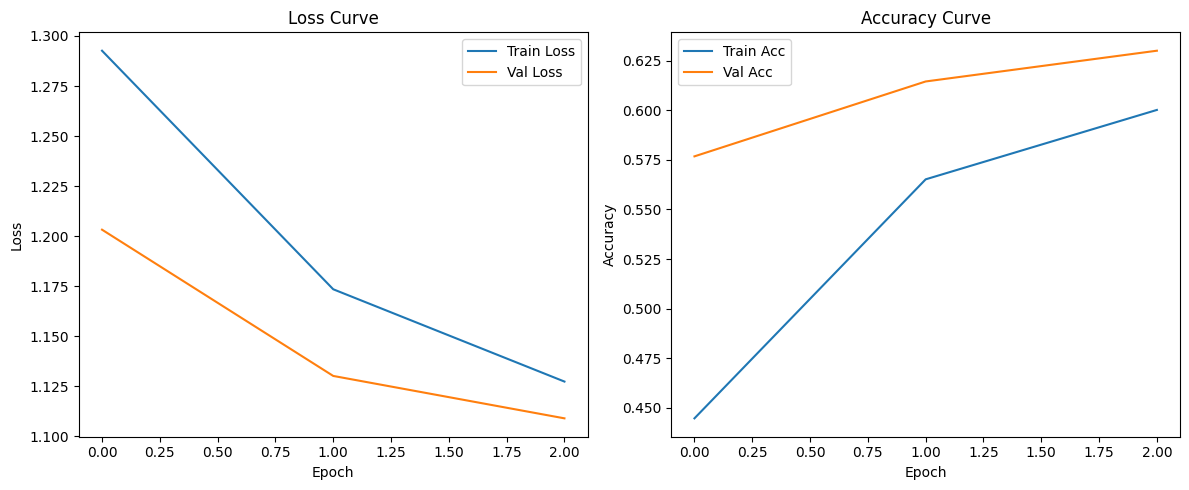

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(base_path + "bert_agnews_finetuned").to(device)
tokenizer = AutoTokenizer.from_pretrained(base_path + "bert_agnews_finetuned")
history = torch.load(base_path + "bert_agnews_finetuned/training_history.pt")

accuracy_metric = torchmetrics.classification.MulticlassAccuracy(num_classes=params['num_classes'])

test_dataset = NewsDataset(
    texts=test_df['full_text'],
    labels=test_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
test_loader = DataLoader(test_dataset, batch_size=params['batch_size'], shuffle=False)

test_loss, test_acc, test_preds, test_labels = evaluate(model, test_loader, device, accuracy_metric)
print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

class_names = ['World', 'Sports', 'Business', 'Technology']
create_classification_report(test_preds, test_labels, class_names)
plot_confusion_matrix(test_preds, test_labels, class_names)
plot_training_history(history)


### Visualize embeddings

Embeddings após fine-tuning:


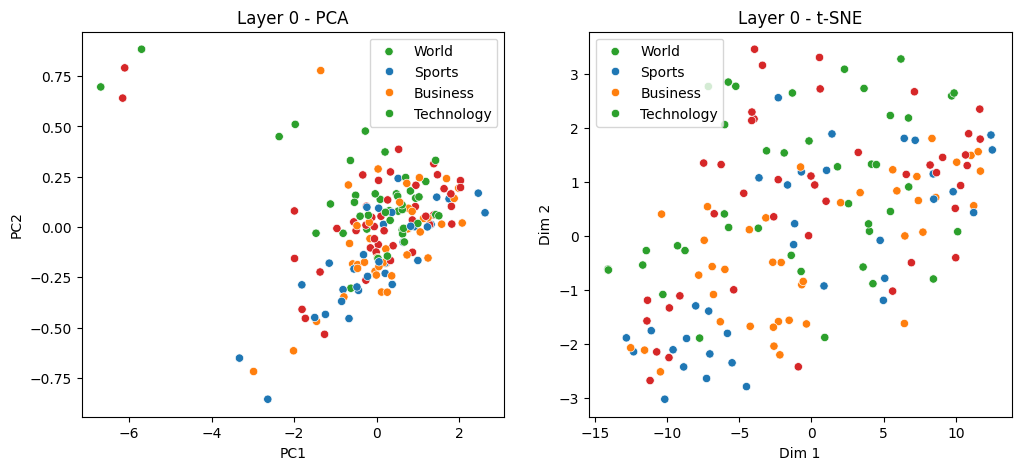

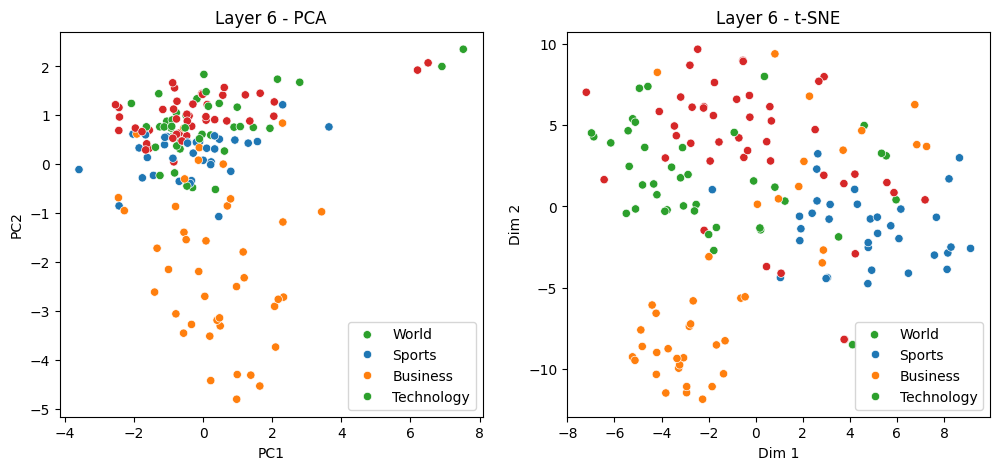

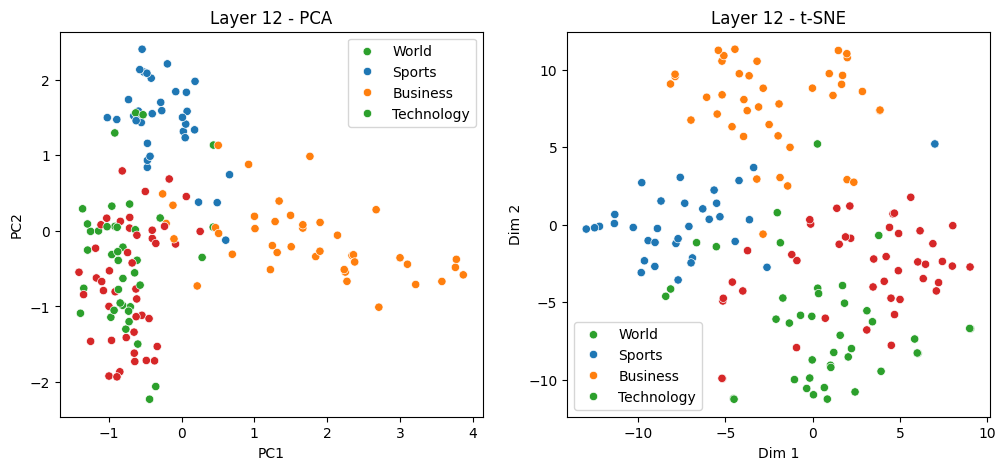

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(base_path + "bert_agnews_finetuned").to(device)

hidden_states_finetuned, labels_finetuned = get_embeddings(model, sample_loader, max_batches=5)

print("Embeddings após fine-tuning:")
visualize_embeddings(hidden_states_finetuned, labels_finetuned, layers_to_viz=[0, 6, 12])


### Advanced Experiments

### 1. Unfreeze last layers

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(base_path + "bert_agnews_finetuned").to(device)
tokenizer = AutoTokenizer.from_pretrained(base_path + "bert_agnews_finetuned")

# Liberar apenas a última camada do encoder do BERT (camada 11)
for name, param in model.bert.named_parameters():
    if "encoder.layer.11" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

# Liberar também o classificador
for param in model.classifier.parameters():
    param.requires_grad = True

total_steps = len(train_df) // params['batch_size'] * params['epochs']
optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=params['learning_rate'], weight_decay=params['weight_decay'])
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=params['warmup_steps'],
    num_training_steps=total_steps
)

train_dataset = NewsDataset(
    texts=train_df['full_text'],
    labels=train_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
val_dataset = NewsDataset(
    texts=val_df['full_text'],
    labels=val_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=params['batch_size'], shuffle=False)

accuracy_metric = torchmetrics.classification.MulticlassAccuracy(num_classes=params['num_classes'])

history_unfreeze = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
for epoch in range(1):
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, scheduler, device, accuracy_metric)
    val_loss, val_acc, _, _ = evaluate(model, val_loader, device, accuracy_metric)
    history_unfreeze['train_loss'].append(train_loss)
    history_unfreeze['train_acc'].append(train_acc)
    history_unfreeze['val_loss'].append(val_loss)
    history_unfreeze['val_acc'].append(val_acc)
print(f"Unfreezing last BERT layer | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

model.save_pretrained(base_path + "bert_agnews_unfreeze_last")
tokenizer.save_pretrained(base_path + "bert_agnews_unfreeze_last")
torch.save(history_unfreeze, base_path + "bert_agnews_unfreeze_last/training_history.pt")


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

Unfreezing last BERT layer | Train Acc: 0.8931 | Val Acc: 0.9248


### 2. Learning Rates

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(base_path + "bert_agnews_finetuned").to(device)
tokenizer = AutoTokenizer.from_pretrained(base_path + "bert_agnews_finetuned")

train_dataset = NewsDataset(
    texts=train_df['full_text'],
    labels=train_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
val_dataset = NewsDataset(
    texts=val_df['full_text'],
    labels=val_df['label'],
    tokenizer=tokenizer,
    max_length=params['max_length']
)
train_loader = DataLoader(train_dataset, batch_size=params['batch_size'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=params['batch_size'], shuffle=False)

accuracy_metric = torchmetrics.classification.MulticlassAccuracy(num_classes=params['num_classes'])

learning_rates = [1e-5, 2e-5, 5e-5, 1e-4]
results_lr = {}
for lr in learning_rates:
    print(f"\nTesting learning rate: {lr}")

    model_lr = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=params['num_classes']).to(device)

    for param in model_lr.bert.parameters():
        param.requires_grad = False
    for param in model_lr.classifier.parameters():
        param.requires_grad = True

    optimizer_lr = optim.AdamW(filter(lambda p: p.requires_grad, model_lr.parameters()), lr=lr, weight_decay=params['weight_decay'])
    scheduler_lr = get_linear_schedule_with_warmup(
        optimizer_lr,
        num_warmup_steps=params['warmup_steps'],
        num_training_steps=total_steps
    )

    history_lr = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for epoch in range(1):
        train_loss, train_acc = train_epoch(model_lr, train_loader, optimizer_lr, scheduler_lr, device, accuracy_metric)
        val_loss, val_acc, _, _ = evaluate(model_lr, val_loader, device, accuracy_metric)
        history_lr['train_loss'].append(train_loss)
        history_lr['train_acc'].append(train_acc)
        history_lr['val_loss'].append(val_loss)
        history_lr['val_acc'].append(val_acc)
    results_lr[lr] = history_lr
    print(f"LR={lr} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    model_lr.save_pretrained(f"{base_path}bert_agnews_lr_{lr}")
    tokenizer.save_pretrained(f"{base_path}bert_agnews_lr_{lr}")
    torch.save(history_lr, f"{base_path}bert_agnews_lr_{lr}/training_history.pt")



Testing learning rate: 1e-05


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

LR=1e-05 | Train Acc: 0.3541 | Val Acc: 0.4946

Testing learning rate: 2e-05


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

LR=2e-05 | Train Acc: 0.4016 | Val Acc: 0.5656

Testing learning rate: 5e-05


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

LR=5e-05 | Train Acc: 0.5026 | Val Acc: 0.6599

Testing learning rate: 0.0001


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Training:   0%|          | 0/3375 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/375 [00:00<?, ?it/s]

LR=0.0001 | Train Acc: 0.5743 | Val Acc: 0.7162


### 3. Parameters distribution across layers

In [ ]:
def print_parameter_distribution(model):
    total = 0
    for name, param in model.named_parameters():
        print(f"{name}: {param.numel()} parameters, requires_grad={param.requires_grad}")
        total += param.numel()
    print(f"Total parameters: {total}")

model = AutoModelForSequenceClassification.from_pretrained(base_path + "bert_agnews_finetuned").to(device)
print_parameter_distribution(model)


bert.embeddings.word_embeddings.weight: 23440896 parameters, requires_grad=True
bert.embeddings.position_embeddings.weight: 393216 parameters, requires_grad=True
bert.embeddings.token_type_embeddings.weight: 1536 parameters, requires_grad=True
bert.embeddings.LayerNorm.weight: 768 parameters, requires_grad=True
bert.embeddings.LayerNorm.bias: 768 parameters, requires_grad=True
bert.encoder.layer.0.attention.self.query.weight: 589824 parameters, requires_grad=True
bert.encoder.layer.0.attention.self.query.bias: 768 parameters, requires_grad=True
bert.encoder.layer.0.attention.self.key.weight: 589824 parameters, requires_grad=True
bert.encoder.layer.0.attention.self.key.bias: 768 parameters, requires_grad=True
bert.encoder.layer.0.attention.self.value.weight: 589824 parameters, requires_grad=True
bert.encoder.layer.0.attention.self.value.bias: 768 parameters, requires_grad=True
bert.encoder.layer.0.attention.output.dense.weight: 589824 parameters, requires_grad=True
bert.encoder.layer.0.

## **Discussion Questions**

### **Theoretical Understanding**

1. **What is the attention mechanism in transformers and why is it important?**

  O mecanismo de atenção permite que o modelo foque nas partes mais relevantes da sequência de entrada. Nesta arquitetura, a atenção representa a infuência de cada palavra na representação das outras. Isso é essencial para capturar dependências de longo alcance e contexto global, o que melhora muito o desempenho em tarefas como NLP.

2. **Explain the difference between self-attention and cross-attention.**

  A auto-atenção ocorre quando cada token da sequência se atenta a todos os outros tokens da mesma sequência. É usado nos encoders e decoders para entender o contexto dentro de uma mesma entrada.

  Já a atenção cuzada ocorre quando uma sequência se atenta a outra sequência, sendo utilizada, por exemplo, no decoder durante a geração, como em tradução.


3. **What are the advantages of using pre-trained models like DistilBERT over training from scratch?**

  Entre as principais vantagens do uso de modelos pré-treinados, destacam-se: velocidade, eficiência, performance e menor dependencia de dados devidamente rotulados. Além disso, estes modelos já vêm com conhecimento linguístico previamente adquirido.

4. **Why do we freeze most parameters during initial fine-tuning?**

  O congelamento da maioria dos parâmetros durante o fine-tuning é essencial para evitar problemas como o esquecimento catastrófico das representações aprendidas, overfitting e o custo computacional elevado. Além disso, esta abordagem permite a especialização do modelo para tarefas mais específicas, mantendo ainda o poder do modelo base.

5. **What is the purpose of the warmup phase in learning rate scheduling?**

  A fase de warmup aumenta gradualmente a taxa de aprendizado no início do treinamento para evitar instabilidades e explosões no gradiente. Isso ajuda a estabilizar o treinamento antes que a taxa de aprendizado atinja seu valor ideal.

### **Implementation Analysis**

6. **How does the embedding visualization change before and after fine-tuning? What does this tell us?**

  Analisando os embeddings antes e após o fine-tuning por meio do t-SNE, percebemos que antes os embeddings das diferentes classes estão mais misturados, pois o modelo ainda não está ajustado para a tarefa. Após o fine-tuning, as representações tendem a se separar por classe, indicando que o modelo aprendeu características discriminativas específicas. Além disso, é possível observar que o PCA não foi, em nehhuma das etapas, capaz de separar os embeddings por classes, devido principalmente à não linearidade dos dados de entrada.

7. **Compare the computational requirements of fine-tuning vs. training from scratch.**

  O treinamento do zero exige muito mais dados, tempo, recursos e GPU, enuanto o fine-tuning é muito mais rápido e eficiente, uma vez que ajusta um modelo já treinado, geralmente modificando poucas camadas.

8. **What would happen if we used a longer sequence length? Discuss trade-offs.**

  Apesar do modelo ser capaz de capturar mais contexto no cenário de textos longos, aumentando significativamente a performance em casos de correlação entre tokens distantes, há um aumento do custo computacional e uso de memória, uma vez que o mecanismo de atenção tem tempo e uso de memória quadrático. Além disso, pode ocorrer overfitting ou lentidão sem melhora substancial, a depender do dataset.

9. **Why is DistilBERT faster than BERT? What are the trade-offs?**

  O DistilBERT é mais rápido que o BERT porque possui menos camadas (6 em vez de 12), menos camadas ocultas e menos parâmetros, além de utilizar knowledge distillation para preservar boa parte do desempenho do modelo original. Como compensação, ele pode apresentar uma leve perda de acurácia e menor desempenho em tarefas mais complexas, sendo menos flexível para ajustes finos profundos.

10. **How would you adapt this code for a different text classification task?**

  Para adaptar o código a uma nova tarefa de classificação de texto, basta substituir o dataset, ajustar os rótulos e atualizar o número de classes no modelo. É importante revisar o pré-processamento (tokenização, truncamento/padding) conforme o novo domínio. Também é necessário configurar métricas apropriadas e realizar o fine-tuning, podendo congelar ou descongelar camadas do encoder dependendo do tamanho e da complexidade do novo conjunto de dados.

### **Performance Analysis**

11. **Analyze your confusion matrix. Which classes are most often confused and why?**

  Analisando a matriz de confusão, percebe-se que no BERT as classes mais confundidas são Business e Technology, além de muitos exemplos de Business sendo classificados como World. Isso pode ocorrer porque notícias de economia frequentemente têm contexto global, o que pode levar o modelo a associá-las incorretamente à categoria World. Já no caso de Technology, a linguagem técnica e o vocabulário próximo ao de negócios também gera ambiguidade. Mesmo no DistilBERT, onde o desempenho é superior, essas confusões ainda aparecem em menor escala, mostrando que a sobreposição semântica entre essas categorias é um desafio contínuo.

12. **What factors contribute to the model's performance on this dataset?**

  O desempenho do modelo nesse dataset é influenciado por fatores como a qualidade e balanceamento dos dados, a representatividade das classes e a clareza dos textos. Além disso, o uso de embeddings pré-treinados, o tamanho do conjunto de treinamento e o ajuste correto dos hiperparâmetros têm grande impacto. O tipo de modelo escolhido (BERT, DistilBERT, etc.) e o número de camadas treinadas também afetam diretamente os resultados.

13. **How would you improve the model's performance further?**

  Para melhorar ainda mais o desempenho do modelo, seria interessante testar estratégias como o unfreezing progressivo de camadas do BERT, aumento no número de epochs e ajuste fino do learning rate. Além disso, aplicar data augmentation textual (como back-translation ou substituição por sinônimos) pode ajudar a generalizar melhor.

14. **Compare the F1-scores across different classes. What might cause the differences?**

  Ao comparar os F1 Scores entre os modelos, nota-se que o BERT obteve por volta de 0.66 enquanto o DistilBERT alcançou por volta de 0.90, indicando uma diferença significativa. Essa variação pode ser causada por fatores como o número de camadas descongeladas, a quantidade de epochs, o ajuste de hiperparâmetros ou até diferenças na inicialização dos pesos. Além disso, a forma como o modelo lida com cada classe pode gerar desequilíbrio no desempenho, especialmente se houver classes com menos amostras ou textos mais ambíguos.

15. **What additional preprocessing steps could improve performance?**

  Algumas etapas adicionais de pré-processamento que poderiam melhorar o desempenho incluem a normalização dos textos (como lowercasing e remoção de caracteres especiais), além da correção ortográfica para evitar ruídos. Também é possível aplicar técnicas como remoção de stopwords ou lematização, dependendo do impacto que isso tiver no contexto da tarefa. Tudo isso ajuda o modelo a focar nas informações mais relevantes do texto.

---

## **Submission Requirements**

1. **Complete Jupyter notebook** with all implementations
2. **Dataset exploration report** with visualizations
3. **Answers to discussion questions**
4. **Performance analysis** including:
   - Training curves
   - Confusion matrix
   - Classification report
   - Embedding visualizations (before/after fine-tuning)

---
## **Grading Criteria**

- **Implementation (40%)**: Correct and complete code implementation
- **Dataset Exploration & Visualization (20%)**: Thorough analysis with meaningful plots
- **Performance Analysis (20%)**: Proper evaluation and interpretation of results  
- **Discussion Questions (20%)**: Thoughtful and accurate responses

---

### **Tips for Success**

1. **Start early** - Transformer training can take time. Also keep in mind the utilization of GPU in Colab environment (or your local setup)
2. **Document your code** - Add comments explaining key steps
3. **Experiment** - Try different hyperparameters and visualize results
4. **Analyze failures** - Look at misclassified examples to understand limitations
5. **Compare approaches** - Try different freezing strategies and compare results

---

#### **Deadline**

Sunday, Jun 29, 11:59 pm.

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- Jun 30, 11:59 pm : grade * 0.75
- Jul 01, 11:59 pm : grade * 0.5
- Jul 02, 11:59 pm : grade * 0.25

---

#### **Submission**

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English) or Google Colaboratory link (remember to share it!).

**This activity is NOT individual, it must be done in pairs (two-person group).**

Only one individual should deliver the notebook.

---

#### **REFERENCES**

Zhang, X., Zhao, J., & LeCun, Y. (2015). Character-level convolutional networks for text classification. Advances in neural information processing systems, 28.
https://doi.org/10.48550/arXiv.1509.01626.

Anand, A. (2018). AG News Classification Dataset [Data set]. Kaggle. https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

Gulli, A. (n.d.). AG's corpus of news articles. http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html